In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_dir="/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

In [ ]:
image_height,image_width=150,150
batch_size=32

In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen=ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height,image_width),
    class_mode='categorical',
    batch_size=32
    )

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height,image_width),
    class_mode='categorical',
    batch_size=32
)



Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
print(f"Classes: {class_names}")

Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}
{'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


In [ ]:
print(train_generator.samples)
print(test_generator.samples)

2239
118


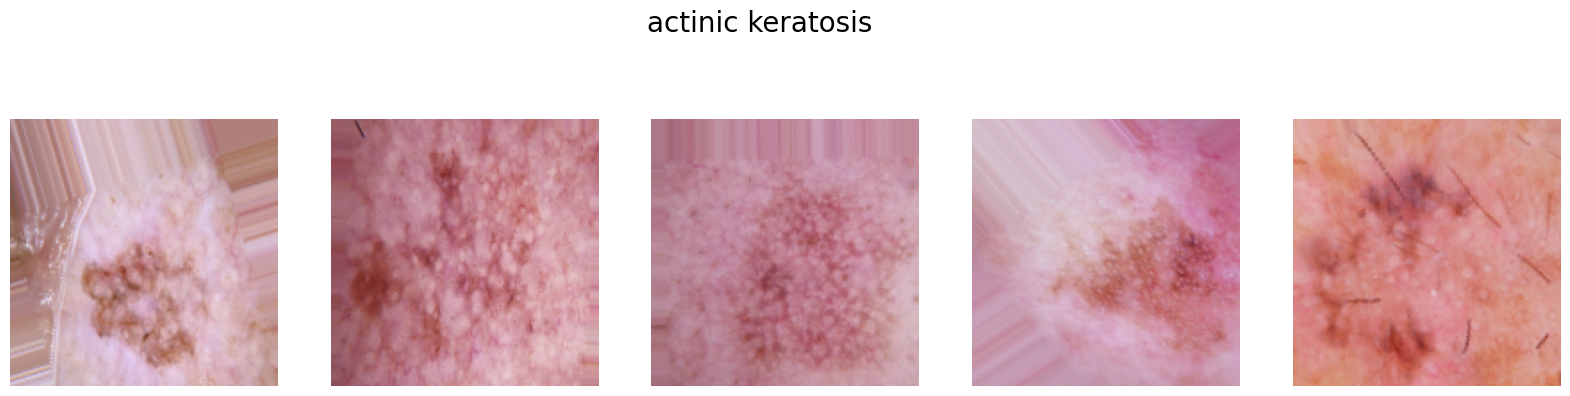

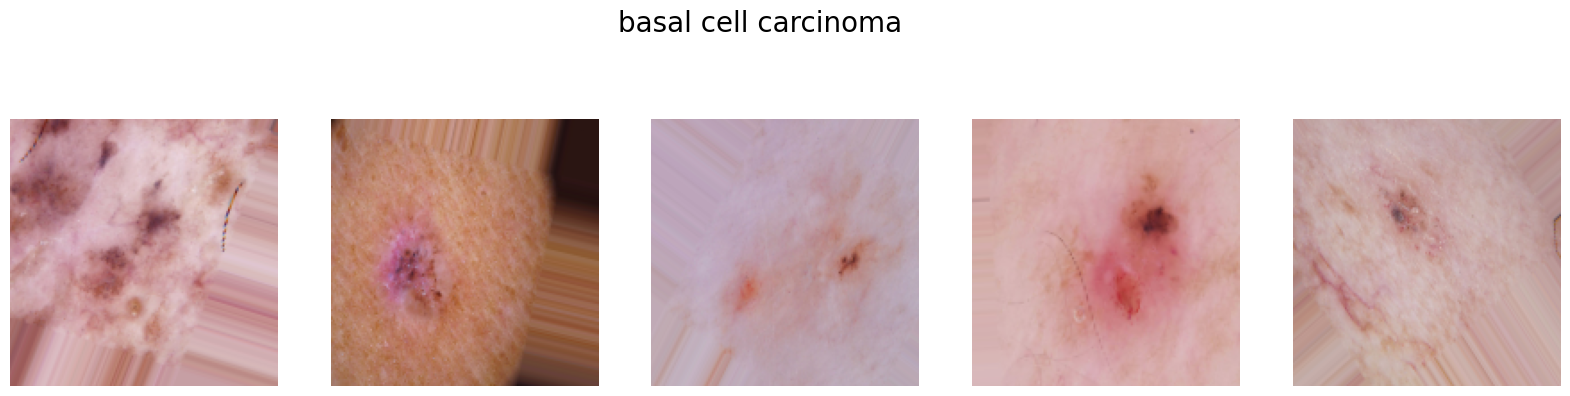

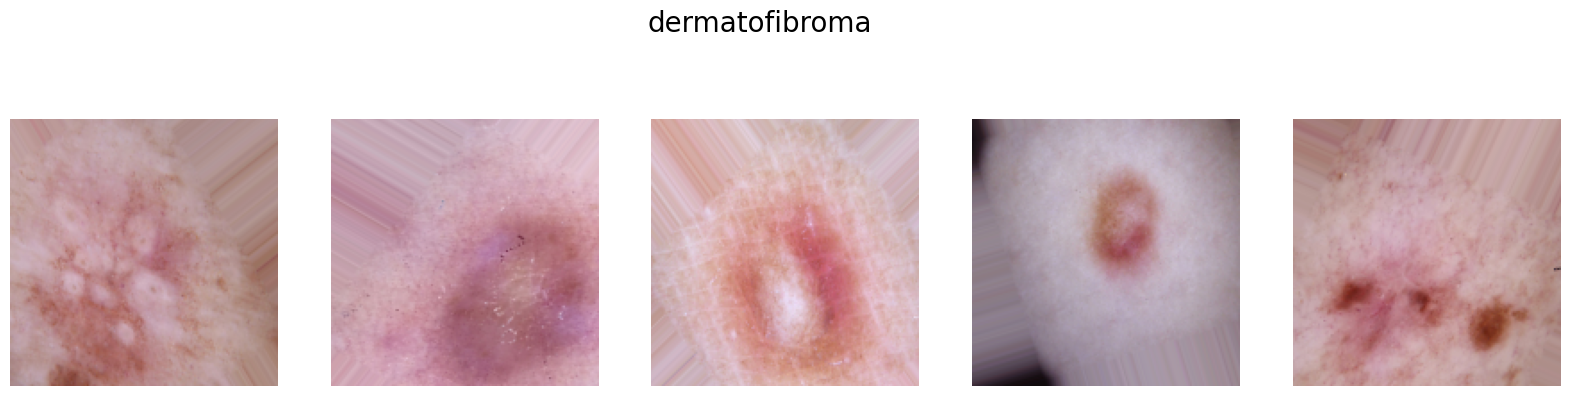

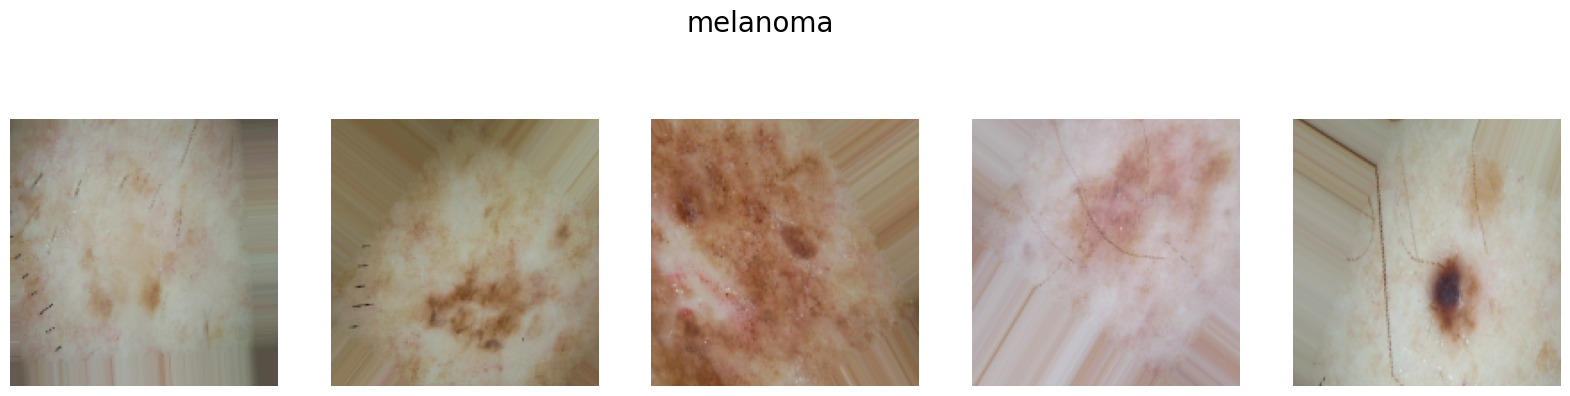

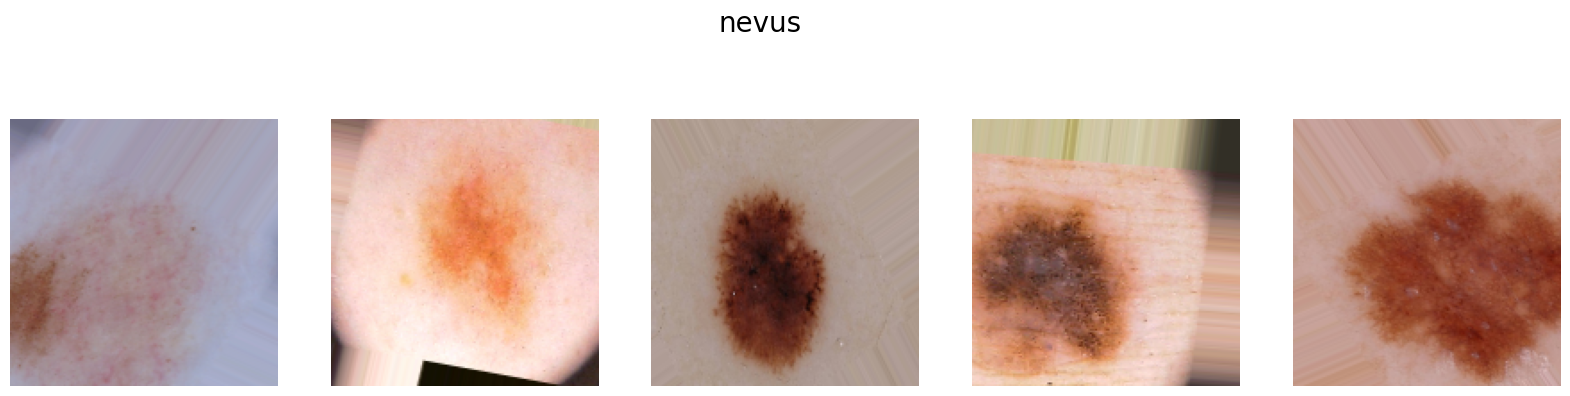

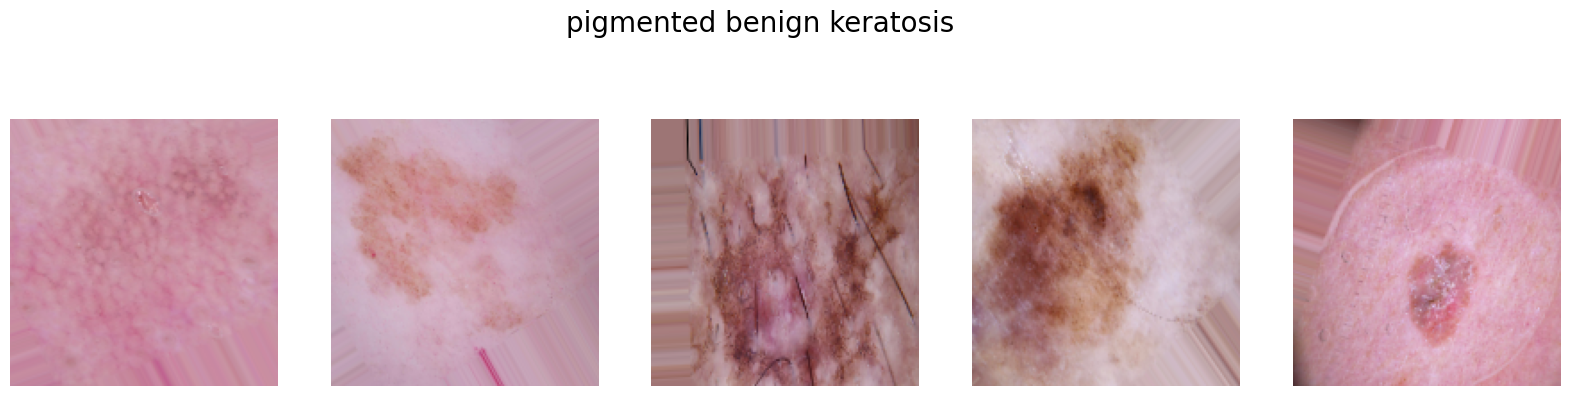

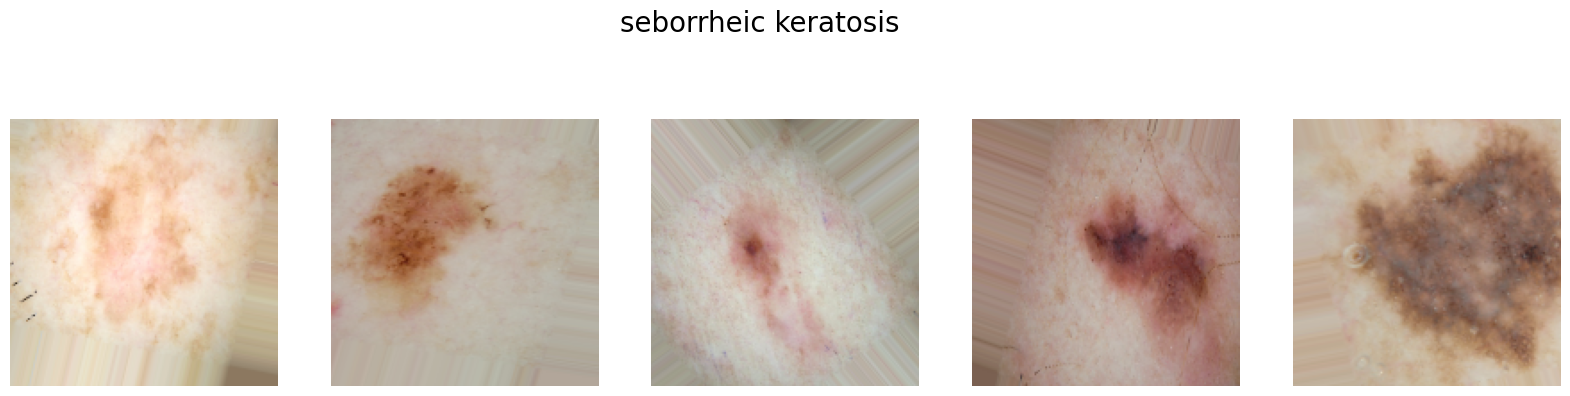

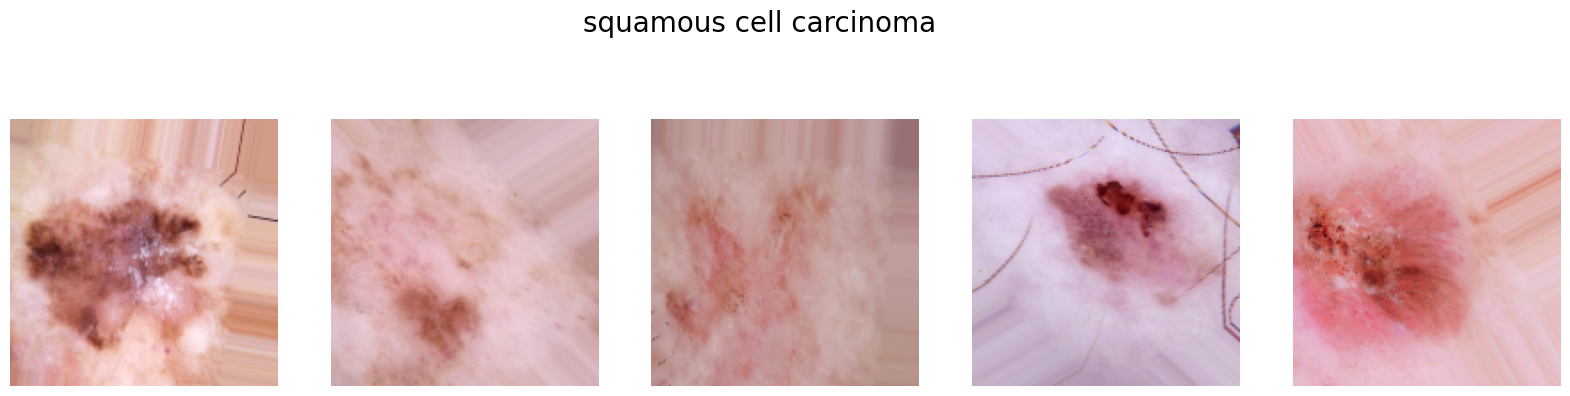

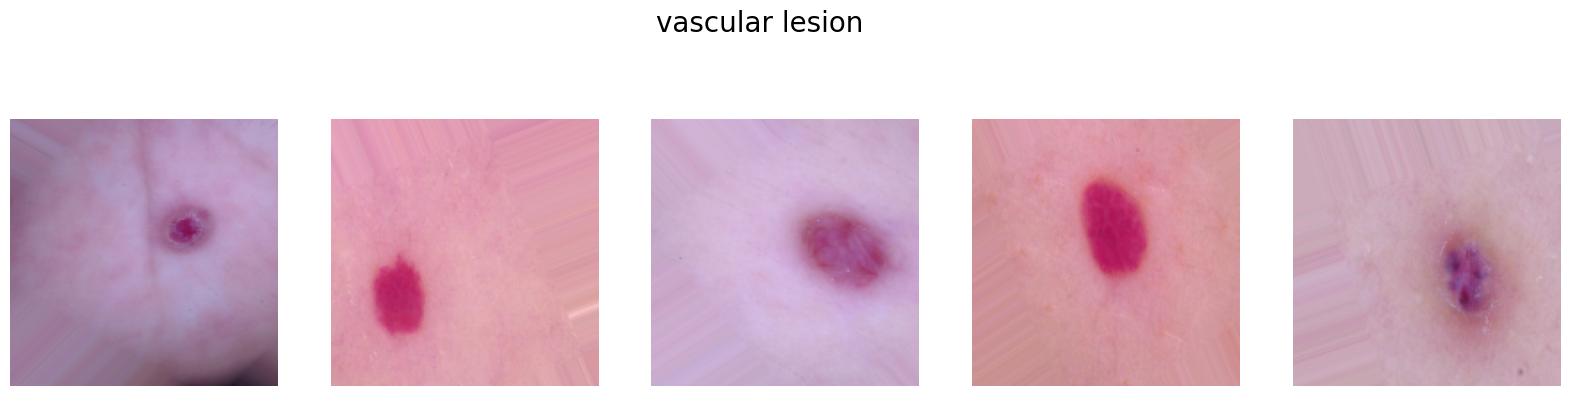

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_generator is already defined as in the previous code

num_images_per_class = 5

for class_name in class_names:
  images = []
  labels = []
  for x,y in train_generator:
    for i in range(len(y)):
      if np.argmax(y[i]) == train_generator.class_indices[class_name] and len(images) < num_images_per_class:
        images.append(x[i])
        labels.append(class_name)
    if len(images) == num_images_per_class:
      break

  plt.figure(figsize=(20, 5))
  plt.suptitle(class_name, fontsize=20)
  for i in range(len(images)):
      plt.subplot(1, num_images_per_class, i + 1)
      plt.imshow(images[i])
      plt.axis('off')
  plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold

X = np.random.rand(100, 150, 150, 3)
y = np.random.randint(0, 7, 100)


n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold + 1}/{n_splits}")

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create data generators for this fold
    train_datagen_fold = ImageDataGenerator(
        rescale=1.0/255.0,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen_fold = ImageDataGenerator(rescale=1.0/255.0)

    model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(image_height,image_width,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


    # Train the model on this fold
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=test_generator
    )

Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 568s 8s/step - accuracy: 0.2080 - loss: 2.3117 - val_accuracy: 0.1949 - val_loss: 2.4515
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.2756 - loss: 1.9106 - val_accuracy: 0.2119 - val_loss: 2.4339
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.3342 - loss: 1.8072 - val_accuracy: 0.1949 - val_loss: 2.2822
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.3440 - loss: 1.8034 - val_accuracy: 0.2881 - val_loss: 2.3710
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.4440 - loss: 1.6025 - val_accuracy: 0.3136 - val_loss: 2.4559
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.4826 - loss: 1.4791 - val_accuracy: 0.3136 - val_loss: 2.2418
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.4927 - loss: 1.4656 - val_accuracy: 0.3136 - val_loss: 2.2621
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5070 - loss: 1.4034 - val_accuracy: 0.3136 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3322 - loss: 2.4210
Test Loss: 2.29994535446167
Test Accuracy: 0.3644067943096161
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


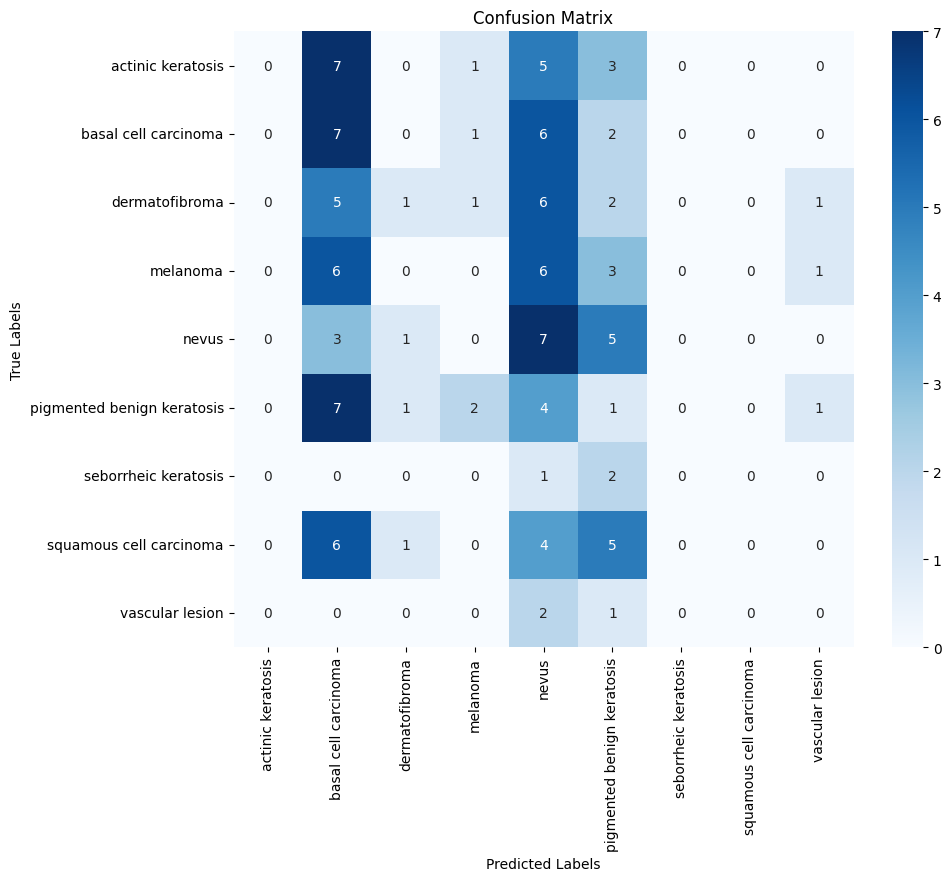

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.17      0.44      0.25        16
            dermatofibroma       0.25      0.06      0.10        16
                  melanoma       0.00      0.00      0.00        16
                     nevus       0.17      0.44      0.25        16
pigmented benign keratosis       0.04      0.06      0.05        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.00      0.00      0.00        16
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.14       118
                 macro avg       0.07      0.11      0.07       118
              weighted avg       0.09      0.14      0.09       118



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


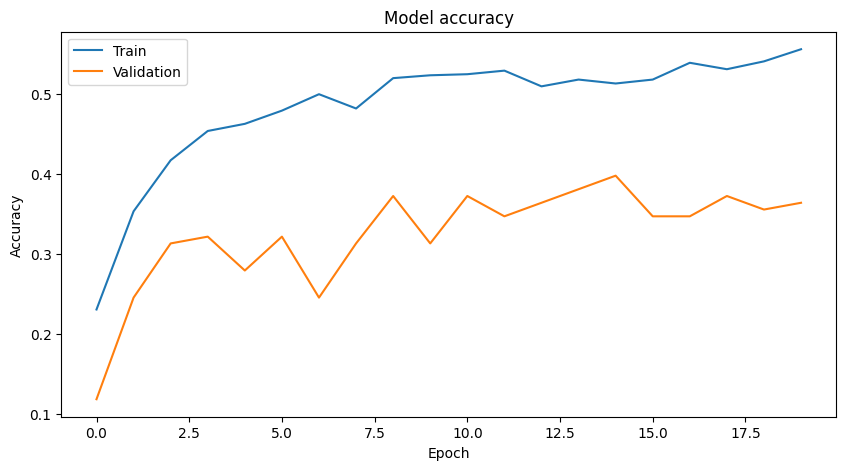

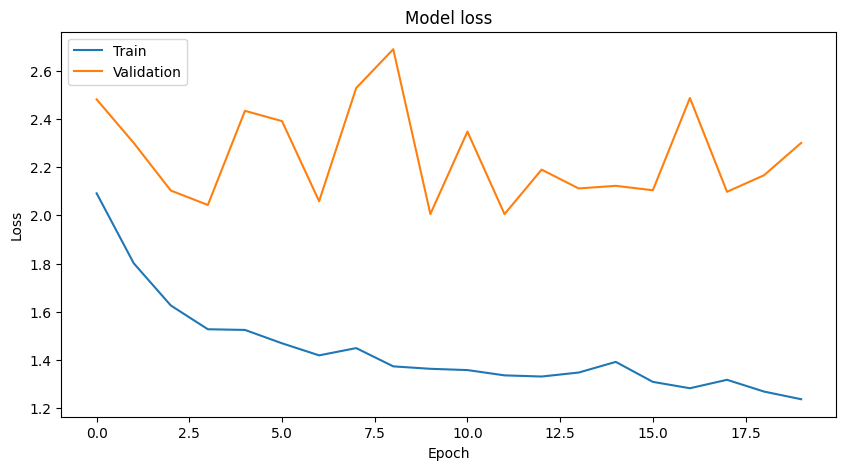

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Get the confus# prompt: write evaluation metrics for above codes.

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-score, and support
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


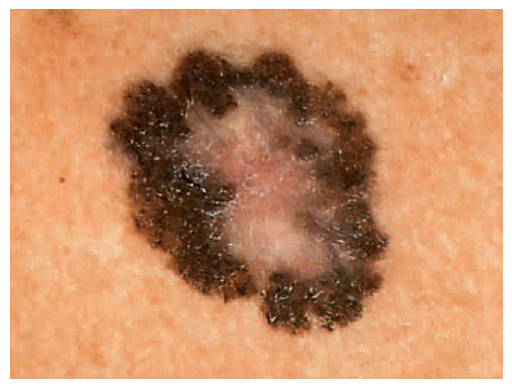


Predicted Class: melanoma


In [ ]:
from tensorflow.keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_image(image_path):
    img=load_img(image_path,target_size=(image_height,image_width))
    img_array=img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    class_idx=(np.argmax(prediction))
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    print(f"\nPredicted Class: {class_names[class_idx]}")

predict_image("/content/drive/MyDrive/test_image_skin_cancer.webp")

In [ ]:
# prompt: save model as .keras zip file

model.save('my_model.keras')
!zip -r my_model.zip my_model.keras
from google.colab import files
files.download('my_model.zip')


  adding: my_model.keras (deflated 21%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import save_model

# Assuming 'model' is your trained CNN
save_model(model, 'skin_cancer_model.h5')  # Saves in HDF5 format
# OR (for newer TF versions)
model.save('skin_cancer_model.keras')

In [ ]:
pip install streamlit pillow numpy tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
# prompt: generate code to save above model and deploy using streamlit with UI as image uploading field and output field which is returned by model.

import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the trained model
model = tf.keras.models.load_model('my_model.keras')  # Assuming 'my_model.keras' is in the same directory

# Define image dimensions (must match the model's input shape)
image_height, image_width = 150, 150
class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'] # Replace with your actual class names

def predict_image(image):
    img = image.resize((image_height, image_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    predicted_class = class_names[class_idx]
    return predicted_class, prediction


st.title("Skin Cancer Image Classifier")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    if st.button("Predict"):
        predicted_class, prediction = predict_image(image)

        st.write(f"Predicted Class: {predicted_class}")


        # Display the prediction probabilities (optional)
        st.write("Prediction Probabilities:")
        for i, prob in enumerate(prediction[0]):
          st.write(f"{class_names[i]}: {prob:.4f}")

        # Plot the image (optional)
        # st.pyplot(plt)
        plt.imshow(image)
        plt.axis("off")
        st.pyplot(plt)


2025-05-09 21:39:55.992 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:39:56.903 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-09 21:39:56.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:39:56.924 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:39:56.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:39:56.929 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:39:56.931 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:39:56.933 Thread 'MainThread': mi

In [ ]:
# prompt: where to view wesite

#The website is viewable by running the streamlit app.
#First, you need to save the code as a Python file (e.g., app.py).
#Then, in the terminal or command prompt, navigate to the directory where you saved the file and run the command:
#streamlit run app.py


#This will open the Streamlit app in your web browser. You can then interact with the app by uploading an image.
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Set page title and layout
st.set_page_config(page_title="Skin Cancer Classification", layout="wide")

# Load the saved model
@st.cache_resource  # Cache model for faster reloads
def load_model():
    return tf.keras.models.load_model('skin_cancer_model.h5')  # or .keras

model = load_model()

# Define class labels (modify based on your dataset)
CLASS_NAMES = [
    "Melanoma",
    "Melanocytic Nevus",
    "Basal Cell Carcinoma",
    "Actinic Keratosis",
    "Benign Keratosis",
    "Dermatofibroma",
    "Vascular Lesion"
]

# Preprocess image for model input
def preprocess_image(image):
    img = image.resize((224, 224))  # Match model's expected input
    img = np.array(img)
    img = img / 255.0  # Normalize (if your model expects [0,1])
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Streamlit UI
st.title("Skin Cancer Classification using CNN 🏥")
st.write("Upload an image of a skin lesion for classification.")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", width=300)

    # Preprocess and predict
    processed_img = preprocess_image(image)
    predictions = model.predict(processed_img)
    predicted_class = CLASS_NAMES[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Show prediction
    st.subheader("Prediction Result")
    st.success(f"**Class:** {predicted_class}")
    st.info(f"**Confidence:** {confidence:.2f}%")

    # Optional: Show prediction probabilities
    st.write("**Detailed Probabilities:**")
    for i, (class_name, prob) in enumerate(zip(CLASS_NAMES, predictions[0])):
        st.write(f"{class_name}: {prob * 100:.2f}%")

2025-05-09 21:42:34.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:42:34.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:42:34.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:42:34.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:42:35.056 Thread 'Thread-20': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:42:35.061 Thread 'Thread-20': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:42:37.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 21:42:37.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare 

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
def upload():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predict_image(fn)
    print("\n\n")
    upload()

upload()